# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv('apartments_data_enriched.csv')[[
                                                 'bfs_number',
                                                 'bfs_name',
                                                 'rooms', 
                                                 'area', 
                                                 'luxurious', 
                                                 'price', 
                                                 'price_per_m2',
                                                 'pop_dens',
                                                 'frg_pct']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0,112,Bubikon,3.5,122,0,3180,26.07,632.558140,11.410675
1,112,Bubikon,4.0,87,0,1690,19.43,632.558140,11.410675
2,261,Zürich,2.5,78,0,3760,48.21,4778.994655,32.458468
3,261,Zürich,5.5,195,0,6900,35.38,4778.994655,32.458468
4,261,Zürich,2.5,59,0,2920,49.49,4778.994655,32.458468


### Filter apartments

In [3]:
# Replace the 5000 below by the 10% quantile or 90% quantile to filter apartments
df = df_orig.loc[df_orig['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(759, 9)


### Data types

In [5]:
df.dtypes

bfs_number        int64
bfs_name         object
rooms           float64
area              int64
luxurious         int64
price             int64
price_per_m2    float64
pop_dens        float64
frg_pct         float64
dtype: object

### Summary statistics of numeric variables

In [6]:
df.describe()

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,180.154150,3.315547,84.798419,0.002635,2272.292490,28.876087,2160.660737,26.970601
std,81.849393,1.102095,32.998444,0.051299,921.340692,12.016232,1641.381575,7.335210
min,2.000000,1.000000,12.000000,0.000000,550.000000,11.060000,82.310984,7.547170
25%,115.000000,2.500000,65.000000,0.000000,1700.000000,21.700000,826.991150,23.009684
50%,199.000000,3.500000,82.000000,0.000000,2050.000000,25.190000,1662.597326,25.994398
75%,261.000000,4.000000,100.000000,0.000000,2550.000000,31.600000,3759.212880,32.458468
max,298.000000,9.000000,300.000000,1.000000,8900.000000,126.330000,4778.994655,46.226483


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 759 Min: 550 Max: 8900 Mean: 2272.3 Median: 2050.0 Std: 921.3
Area: Count: 759 Min: 12 Max: 300 Mean: 84.8 Median: 82.0 Std: 33.0


### Quantiles

In [8]:
df.dtypes

bfs_number        int64
bfs_name         object
rooms           float64
area              int64
luxurious         int64
price             int64
price_per_m2    float64
pop_dens        float64
frg_pct         float64
dtype: object

In [9]:
df_number = df.drop(columns=['bfs_name'])

In [10]:
df_number.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0.05,30.0,1.0,34.9,0.0,1300.0,17.65,367.02,14.09
0.10,55.0,1.5,49.8,0.0,1480.0,19.22,526.68,18.23
0.25,115.0,2.5,65.0,0.0,1700.0,21.70,826.99,23.01
0.50,199.0,3.5,82.0,0.0,2050.0,25.19,1662.60,25.99
0.75,261.0,4.0,100.0,0.0,2550.0,31.60,3759.21,32.46
0.90,261.0,4.5,120.2,0.0,3330.6,43.44,4778.99,33.44
0.95,261.0,4.5,140.0,0.0,4029.8,53.37,4778.99,37.79


### Skewness

In [11]:
df_number.skew()

bfs_number      -0.597681
rooms           -0.076355
area             1.410217
luxurious       19.442120
price            2.191111
price_per_m2     2.535446
pop_dens         0.724004
frg_pct          0.121935
dtype: float64

### Kurtosis

In [12]:
df_number.kurtosis()

bfs_number       -0.947607
rooms             0.449078
area              5.780915
luxurious       376.989421
price             7.805873
price_per_m2     10.375737
pop_dens         -1.075539
frg_pct           0.561269
dtype: float64

### Extreme values

In [13]:
# Low costs apartments
df[df.price <= 1000].head()

,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
176,261,Zürich,1.0,38,0,900,23.68,4778.994655,32.458468
336,230,Winterthur,1.0,27,0,970,35.93,1662.597326,24.535004
354,118,Rüti (ZH),1.0,34,0,850,25.00,1221.272366,24.841283
438,199,Volketswil,1.0,35,0,995,28.43,1327.635328,24.597639
559,27,Feuerthalen,2.5,55,0,995,18.09,1457.258065,22.495849


In [14]:
# Very expansive apartments
df[df.price >= 6000].head()

,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
3,261,Zürich,5.5,195,0,6900,35.38,4778.994655,32.458468
16,261,Zürich,4.5,128,0,6630,51.80,4778.994655,32.458468
32,261,Zürich,2.5,282,0,7500,26.60,4778.994655,32.458468
67,261,Zürich,5.0,187,0,8900,47.59,4778.994655,32.458468
89,261,Zürich,3.5,125,0,6390,51.12,4778.994655,32.458468


### Get a list of categories of categorical variable

In [15]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Affoltern am Albis', 'Andelfingen', 'Bachenbülach',
       'Bassersdorf', 'Bauma', 'Berg am Irchel', 'Birmensdorf (ZH)',
       'Bonstetten', 'Boppelsen', 'Brütten', 'Bubikon', 'Buchs (ZH)',
       'Bäretswil', 'Bülach', 'Dachsen', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dägerlen', 'Dällikon', 'Dänikon', 'Dübendorf',
       'Dürnten', 'Egg', 'Eglisau', 'Elsau', 'Embrach', 'Fehraltorf',
       'Feuerthalen', 'Fällanden', 'Glattfelden', 'Gossau (ZH)',
       'Greifensee', 'Hausen am Albis', 'Hedingen', 'Herrliberg',
       'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon', 'Hüttikon',
       'Illnau-Effretikon', 'Kappel am Albis', 'Kilchberg (ZH)', 'Kloten',
       'Knonau', 'Küsnacht (ZH)', 'Langnau am Albis', 'Laufen-Uhwiesen',
       'Lindau', 'Lufingen', 'Maschwanden', 'Maur', 'Meilen',
       'Mettmenstetten', 'Männedorf', 'Mönchaltorf', 'Neerach',
       'Niederglatt', 'Niederhasli', 'Niederweningen', 'Nürensdorf',
       'Oberengstringen', 'Oberglatt', '

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [16]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,9.0
luxurious,,,,,,,,,,,,,
0,39,40,33,128,58,229,44,150,9,24,1,1,1
1,0,0,1,0,0,0,0,1,0,0,0,0,0


### Pivot tables

In [17]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area']],
               index=['rooms'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=np.mean)

,area,price,price_per_m2
rooms,,,
1.0,43.153846,1470.410256,41.778462
1.5,64.925000,1965.225000,42.035000
2.0,55.558824,1554.147059,28.892353
2.5,68.257812,2252.429688,33.714297
3.0,69.482759,1814.413793,26.667759
3.5,86.938865,2325.353712,26.950437
4.0,86.340909,2208.863636,25.760455
4.5,109.264901,2615.503311,24.176159
5.0,129.666667,3500.444444,24.788889


### Correlation matrix

In [18]:
corr = df_number.corr()
corr

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,1.000000,-0.208844,-0.117564,-0.007952,0.251808,0.384585,0.591947,0.267067
rooms,-0.208844,1.000000,0.669591,-0.003059,0.365597,-0.413725,-0.220305,-0.129815
area,-0.117564,0.669591,1.000000,0.054868,0.565153,-0.445342,-0.142626,-0.104852
luxurious,-0.007952,-0.003059,0.054868,1.000000,0.015503,-0.033199,-0.051893,-0.066413
price,0.251808,0.365597,0.565153,0.015503,1.000000,0.348865,0.428713,0.239576
price_per_m2,0.384585,-0.413725,-0.445342,-0.033199,0.348865,1.000000,0.597837,0.343795
pop_dens,0.591947,-0.220305,-0.142626,-0.051893,0.428713,0.597837,1.000000,0.648172
frg_pct,0.267067,-0.129815,-0.104852,-0.066413,0.239576,0.343795,0.648172,1.000000


### Covariance matrix

In [19]:
cov = df_number.cov()
cov

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,6699.323172,-18.838943,-317.528252,-0.033388,18989.113164,378.247253,7.952580e+04,160.342188
rooms,-18.838943,1.214613,24.351291,-0.000173,371.228824,-5.478975,-3.985224e+02,-1.049440
area,-317.528252,24.351291,1088.897306,0.092880,17182.246373,-176.585790,-7.725055e+03,-25.379437
luxurious,-0.033388,-0.000173,0.092880,0.002632,0.732737,-0.020465,-4.369450e+00,-0.024990
price,18989.113164,371.228824,17182.246373,0.732737,848868.671593,3862.299114,6.483309e+05,1619.111800
price_per_m2,378.247253,-5.478975,-176.585790,-0.020465,3862.299114,144.389820,1.179127e+04,30.302617
pop_dens,79525.798468,-398.522360,-7725.054766,-4.369450,648330.870054,11791.273013,2.694133e+06,7803.913805
frg_pct,160.342188,-1.049440,-25.379437,-0.024990,1619.111800,30.302617,7.803914e+03,53.805301


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

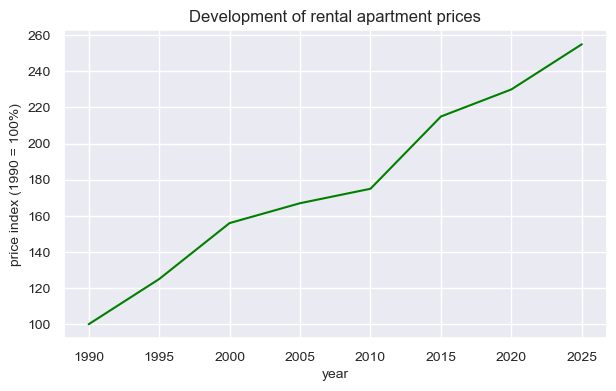

In [20]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<AxesSubplot:xlabel='price'>

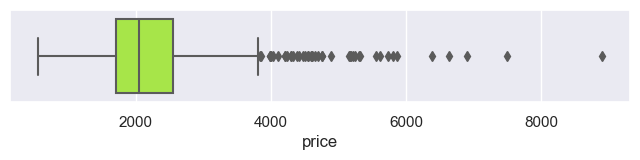

In [21]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price'], color="greenyellow")

### Histogram  (matplotlib)

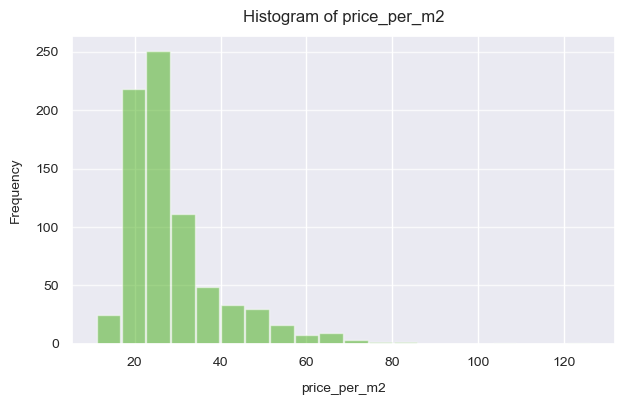

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

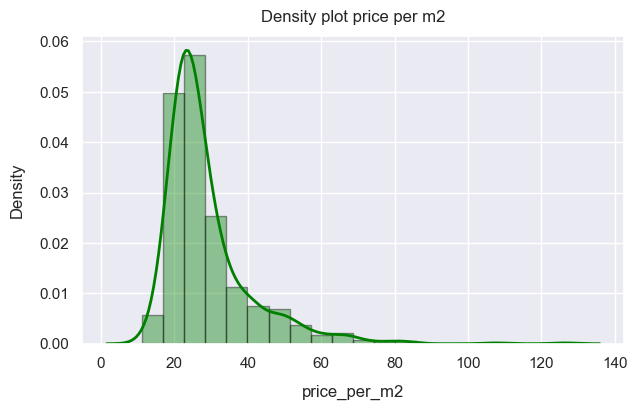

In [23]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     area       var
604    12 -2.206117
8      15 -2.115203
366    19 -1.993986
94     20 -1.963681
503    20 -1.963681
..    ...       ...
3     195  3.339599
76    231  4.430560
564   269  5.582129
32    282  5.976087
745   300  6.521568

[759 rows x 2 columns]


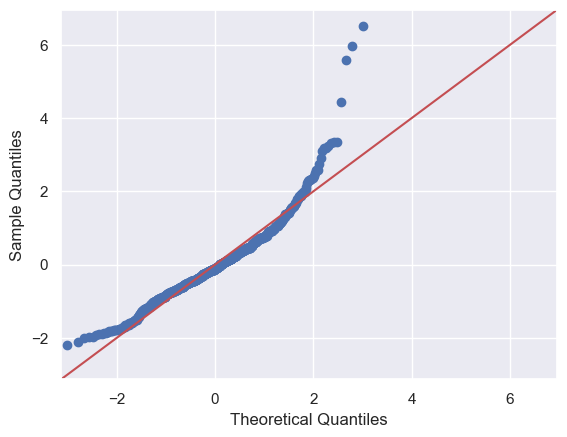

In [24]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

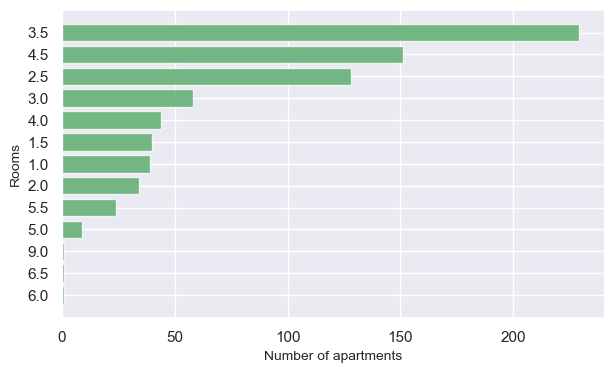

In [25]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, labels=index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

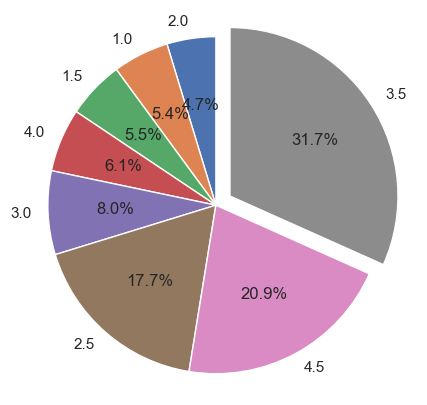

In [26]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

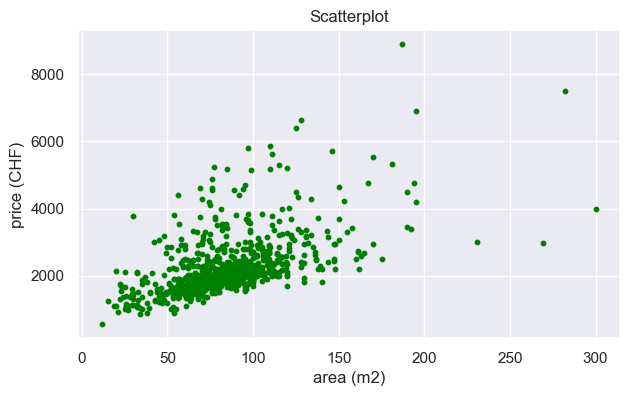

In [27]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(749, 10)
15.437378002637354
971.2802021751471


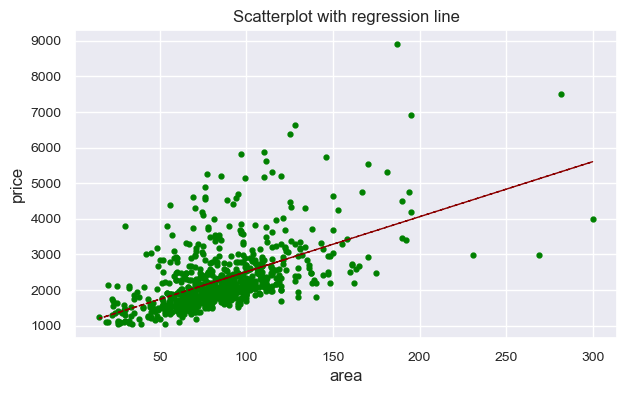

In [28]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

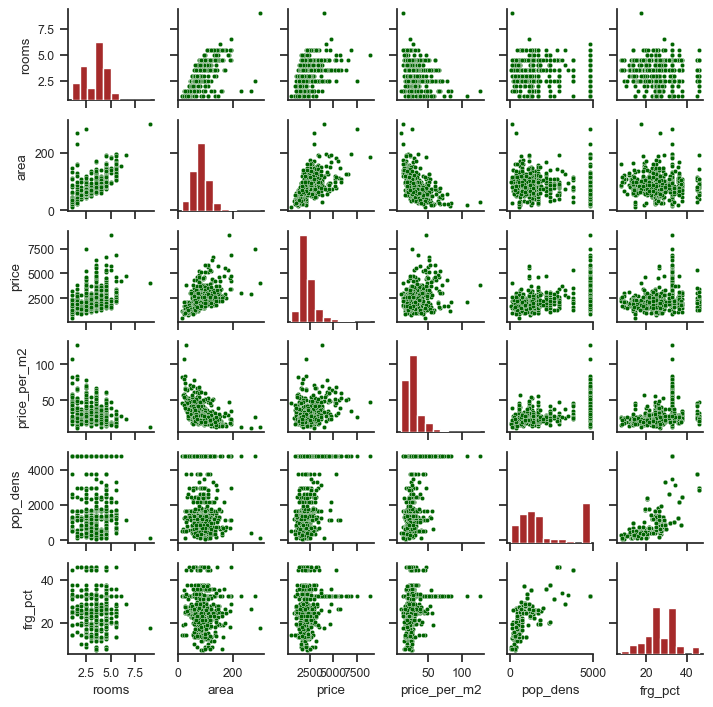

In [29]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(751, 10)


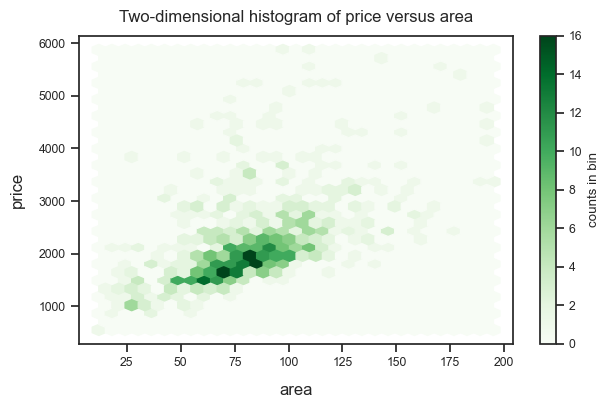

In [30]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<AxesSubplot:>

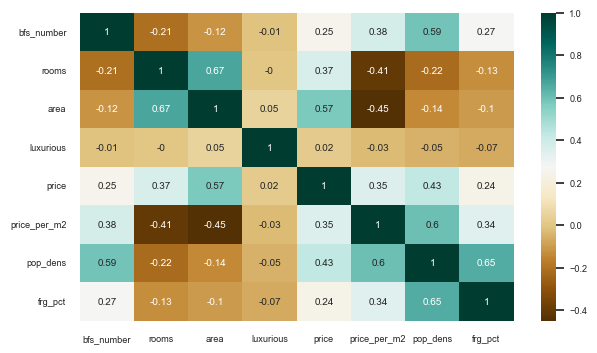

In [31]:
# Set font size for plot
sns.set_theme(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df_number.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

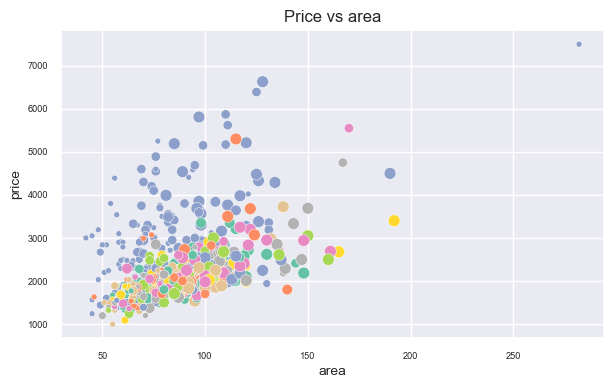

In [32]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [33]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-05-08 17:18:06
Python Version: 3.9.13
-----------------------------------
